x 0
y 0


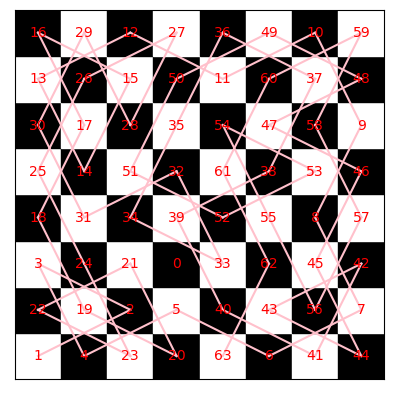

In [5]:
import numpy as np
import sys
from random import randint
import numpy as np
import matplotlib.pyplot as plt

def printChessboard(n, board):
    move_x = [2, 1, -1, -2, -2, -1, 1, 2]
    move_y = [1, 2, 2, 1, -1, -2, -2, -1]

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    for i in range(n):
        for j in range(n):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white' if (i+j) % 2 == 0 else 'black'))
            ax.text(j + 0.5, i + 0.5, str(board[i][j]), color='red', ha='center', va='center')
            if board[i][j] != -1:
                curr_step = board[i][j]
                for k in range(8):
                    new_x = i + move_x[k]
                    new_y = j + move_y[k]
                    if new_x >= 0 and new_x < n and new_y >= 0 and new_y < n and board[new_x][new_y] == curr_step + 1:
                        ax.plot([j + 0.5, new_y + 0.5], [i + 0.5, new_x + 0.5], color='pink')

    ax.set_xlim([0, n])
    ax.set_ylim([0, n])
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
nodes=list()
for i in range(0,8):
    for j in range(0,8):
        t=[i,j]
        nodes.append(t)
def checkMove(l):
    if 0<=l[0]<8 and 0<=l[1]<8:
        return True
    else:
        return False

def getMoves(node):
    m=[[1,2],[-1,2],[1,-2],[-1,-2],[2,1],[-2,1],[2,-1],[-2,-1]]
    moves=list()
    for i in range(0,8):
        x=node[0]+m[i][0]
        y=node[1]+m[i][1]
        if checkMove([x,y]):
            moves.append([x,y])
    return moves

def getStates(history,move):
    moves=getMoves(move)
    states=0
    for m in moves:
        if not m in history:
            states+=1
    return states

def findNextMoves(history):
    moves=getMoves(history[-1])
    ms=list()
    for move in moves:
        if not(move in history):
            e=(move,getStates(history,move))
            ms.append(e)
    return ms
def go(history):
    f = findNextMoves(history)
    if f == []:
        return False
    else:
        moves, states = zip(*findNextMoves(history))
    maximum = max(states)
    if maximum != 0:
        if 1 in states:
            return moves[states.index(1)]
        else:
            min_states = [i for i, state in enumerate(states) if state == min(states)]
            random_index = randint(0, len(min_states) - 1)
            return moves[min_states[random_index]]
    elif maximum == 0 and len(history) == 63:
        last_move = history[-1]
        start_move = history[0]
        if abs(last_move[0] - start_move[0]) == 1 and abs(last_move[1] - start_move[1]) == 2:
            return start_move
        elif abs(last_move[0] - start_move[0]) == 2 and abs(last_move[1] - start_move[1]) == 1:
            return start_move
        else:
            return False
    else:
        return False
history = list()
start_x = int(input("x"))
start_y = int(input("y"))
start = [start_x, start_y]
history.append(start)

next_move = go(history)
history.append(next_move)

board = np.zeros((8, 8), dtype=int)

board[start[0]][start[1]] = 1
board[next_move[0]][next_move[1]] = 2

while True:
    m = go(history)
    if m == False:
        break
    else:
        history.append(m)

        board[m[0]][m[1]] = len(history)

printChessboard(8, board)